# outlier_detection_using_percentile 

**FORMULAS**
* lower_limit = df["column_name"].quantile(min_value)
* upper_limit = df["column_name"].quantile(max_value)

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df1 = pd.read_csv("dataset/placement.csv")
df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [122]:
df1.shape

(1000, 3)

In [123]:
df1.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


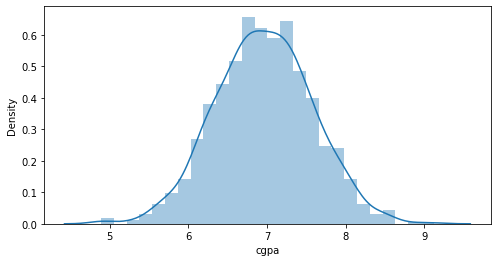

In [124]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df1["cgpa"])
plt.show()

C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


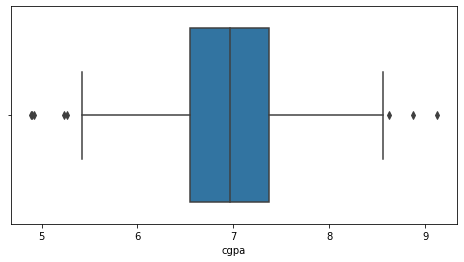

In [125]:
fig = plt.figure(figsize=(8,4))
sns.boxplot(df1["cgpa"])
plt.show()

In [126]:
df1["cgpa"].skew()

-0.014529938929314918

**Finding the upper limit**

In [127]:
ul = df1["cgpa"].quantile(0.99)
ul

8.4201

**Finding the lower limit**

In [128]:
ll = df1["cgpa"].quantile(0.01)
ll

5.5596

**Finding the number of outlier**

In [129]:
df1["cgpa"].count() - df1[(df1["cgpa"] < ul) & (df1["cgpa"] > ll)].count()

cgpa                    20
placement_exam_marks    20
placed                  20
dtype: int64

**Trimming**

In [130]:
df2 = df1[(df1["cgpa"] < ul) & (df1["cgpa"] > ll)]
df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
990,6.17,33.0,1
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1


**capping**

In [131]:
df3 = df1.copy()
df3

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [132]:
df3['cgpa'] = np.where(
    df3['cgpa']>ul,
    ul,
    np.where(
        df3['cgpa']<ll,
        ll,
        df3['cgpa']
    )
)

In [133]:
df3

,cgpa,placement_exam_marks,placed
0,7.1900,26.0,1
1,7.4600,38.0,1
2,7.5400,40.0,1
3,6.4200,8.0,1
4,7.2300,17.0,0
...,...,...,...
995,8.4201,44.0,1
996,8.4201,65.0,1
997,5.5596,34.0,0
998,8.4201,46.0,1


In [134]:
df3[(df3["cgpa"] > ul) |  (df3["cgpa"] < ll)]

,cgpa,placement_exam_marks,placed


C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for h

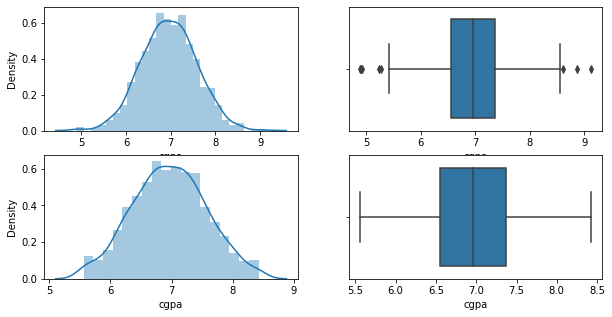

In [135]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df1["cgpa"])

plt.subplot(2,2,2)
sns.boxplot(df1["cgpa"])

#New
plt.subplot(2,2,3)
sns.distplot(df3["cgpa"])

plt.subplot(2,2,4)
sns.boxplot(df3["cgpa"])

plt.show()